In [ ]:
from google.colab import files
import pandas as pd

# Upload dataset
uploaded = files.upload()

# Get the filename automatically
filename = list(uploaded.keys())[0]

# Load CSV (semicolon separated)
df = pd.read_csv(filename, sep=";")
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


Saving cardio_train.csv to cardio_train.csv
✅ Dataset loaded successfully!
Shape: (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.shape

(70000, 13)

In [ ]:
print("\n--- Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Target Distribution ---")
print(df['cardio'].value_counts(normalize=True))



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None

--- Missing Values ---
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke         

In [ ]:
# Convert age (days -> years)
df['age'] = (df['age'] / 365).round().astype(int)

# Drop ID column if present
for col in ['id', 'ID', 'Id']:
    if col in df.columns:
            df = df.drop(columns=[col])

            # Features & target
            X = df.drop("cardio", axis=1)
            y = df["cardio"]

            print("✅ Preprocessing done. Features shape:", X.shape)


✅ Preprocessing done. Features shape: (70000, 11)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("✅ Train/Test split done.")
print("Train size:", X_train.shape, "Test size:", X_test.shape)

✅ Train/Test split done.
Train size: (56000, 11) Test size: (14000, 11)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define ML models
models = {
    "Logistic Regression": Pipeline([
            ('scaler', StandardScaler()),
                    ('clf', LogisticRegression(max_iter=2000))
                        ]),
                            "SVM (RBF)": Pipeline([
                                    ('scaler', StandardScaler()),
                                            ('clf', SVC(kernel='rbf', probability=True))
                                                ]),
                                                    "KNN": Pipeline([
                                                            ('scaler', StandardScaler()),
                                                                    ('clf', KNeighborsClassifier(n_neighbors=5))
                                                                        ]),
                                                                            "Decision Tree": DecisionTreeClassifier(random_state=42),
                                                                                "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
                                                                                }


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

results = []
best_model = None
best_score = -1
best_name = ""

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append([name, acc])
    print(f"\n{name} Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred))
    if acc > best_score:
      best_model = model
      best_score = acc
      best_name = name
      # Show results table
      results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
      print("\n📊 Accuracy Comparison:")
      print(results_df)
      print(f"\n✅ Best Model: {best_name} with Accuracy = {best_score:.3f}")


Logistic Regression Accuracy: 0.713
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      7004
           1       0.73      0.67      0.70      6996

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000


📊 Accuracy Comparison:
                 Model  Accuracy
0  Logistic Regression  0.713429

✅ Best Model: Logistic Regression with Accuracy = 0.713

SVM (RBF) Accuracy: 0.725
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      7004
           1       0.74      0.69      0.72      6996

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000


📊 Accuracy Comparison:
                 Model  Accuracy
0  Logistic Regression  0.713429
1            SVM (RBF)  0.724929

✅ Best Mode

In [ ]:
df.shape

(70000, 12)

In [ ]:
import joblib
joblib.dump(best_model, "heart_disease_best_model.pkl")

print("✅ Best model saved as heart_disease_best_model.pkl")


✅ Best model saved as heart_disease_best_model.pkl


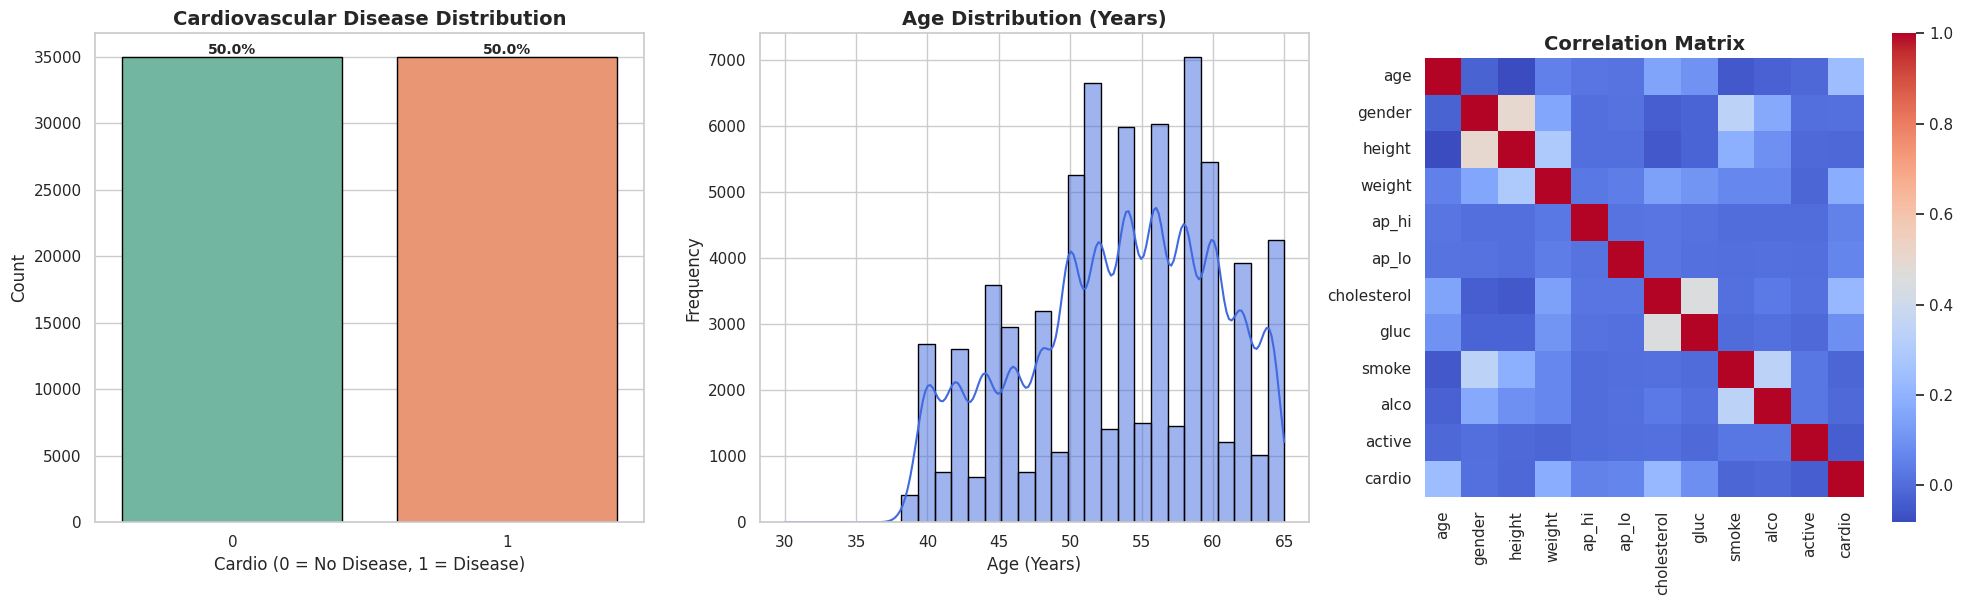

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Apply a clean theme
sns.set_theme(style="whitegrid", palette="muted")

# Create subplots in a grid layout
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# --- 1. Target Distribution ---
sns.countplot(x="cardio", data=df, ax=axes[0], palette="Set2", edgecolor="black", hue="cardio", legend=False)
axes[0].set_title("Cardiovascular Disease Distribution", fontsize=14, weight="bold")
axes[0].set_xlabel("Cardio (0 = No Disease, 1 = Disease)")
axes[0].set_ylabel("Count")

# Add percentage labels
total = len(df)
for p in axes[0].patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axes[0].annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, weight="bold")

# --- 2. Age Distribution ---
sns.histplot(df["age"], bins=30, kde=True, ax=axes[1], color="royalblue", edgecolor="black")
axes[1].set_title("Age Distribution (Years)", fontsize=14, weight="bold")
axes[1].set_xlabel("Age (Years)")
axes[1].set_ylabel("Frequency")

# --- 3. Correlation Matrix ---
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False, ax=axes[2], cbar=True, square=True)
axes[2].set_title("Correlation Matrix", fontsize=14, weight="bold")

plt.tight_layout()
plt.show()

In [22]:
from google.colab import files
files.download("heart_disease_best_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
import joblib
model = joblib.load("heart_disease_best_model.pkl")


In [25]:
y_pred = model.predict(X_test)

In [27]:
import pandas as pd
import joblib

# 1. Load the saved model
model = joblib.load("heart_disease_best_model.pkl")

# 2. Create an example patient (same features as training data, without 'cardio')
# ⚠️ Replace these values with actual patient input
new_patient = {
    "age": 55,          # years
    "gender": 1,        # 1 = female, 2 = male
    "height": 170,      # cm
    "weight": 80,       # kg
    "ap_hi": 145,       # systolic BP
    "ap_lo": 95,        # diastolic BP
    "cholesterol": 2,   # 1 = normal, 2 = above normal, 3 = well above normal
    "gluc": 1,          # 1 = normal, 2 = above normal, 3 = well above normal
    "smoke": 0,         # 0 = no, 1 = yes
    "alco": 0,          # 0 = no, 1 = yes
    "active": 1         # 0 = no, 1 = yes
}

# Convert to DataFrame (model expects tabular format)
new_df = pd.DataFrame([new_patient])

# 3. Make prediction
prediction = model.predict(new_df)[0]

# 4. Show result
if prediction == 1:
    print("⚠️ High risk of Cardiovascular Disease")
else:
    print("✅ No Cardiovascular Disease Detected")

# 5. (Optional) Probability of disease if model supports it
if hasattr(model, "predict_proba"):
    prob = model.predict_proba(new_df)[0][1]
    print(f"Predicted risk probability: {prob*100:.2f}%")

⚠️ High risk of Cardiovascular Disease
Predicted risk probability: 77.86%
